In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
# Access Google Drive through Google Colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Initiation of the directory where the data is stored
path = "/content/gdrive/MyDrive/DF9/Random Forest/"

# Check the directory
import os
os.listdir(path)

['bank-additional-full.csv', 'Untitled0.ipynb']

In [4]:
# Load data
data = pd.read_csv(path + 'bank-additional-full.csv', sep=';')

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

non-null data, data cleaned.
Data has 41188 examples and 20 features + the target variable (y). 5 of the features are floats, 5 are integers and 11 are objects.

In [6]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**What features could contribute to "y" column (subcribe campaigns)?**

Check correlation with categorical feature

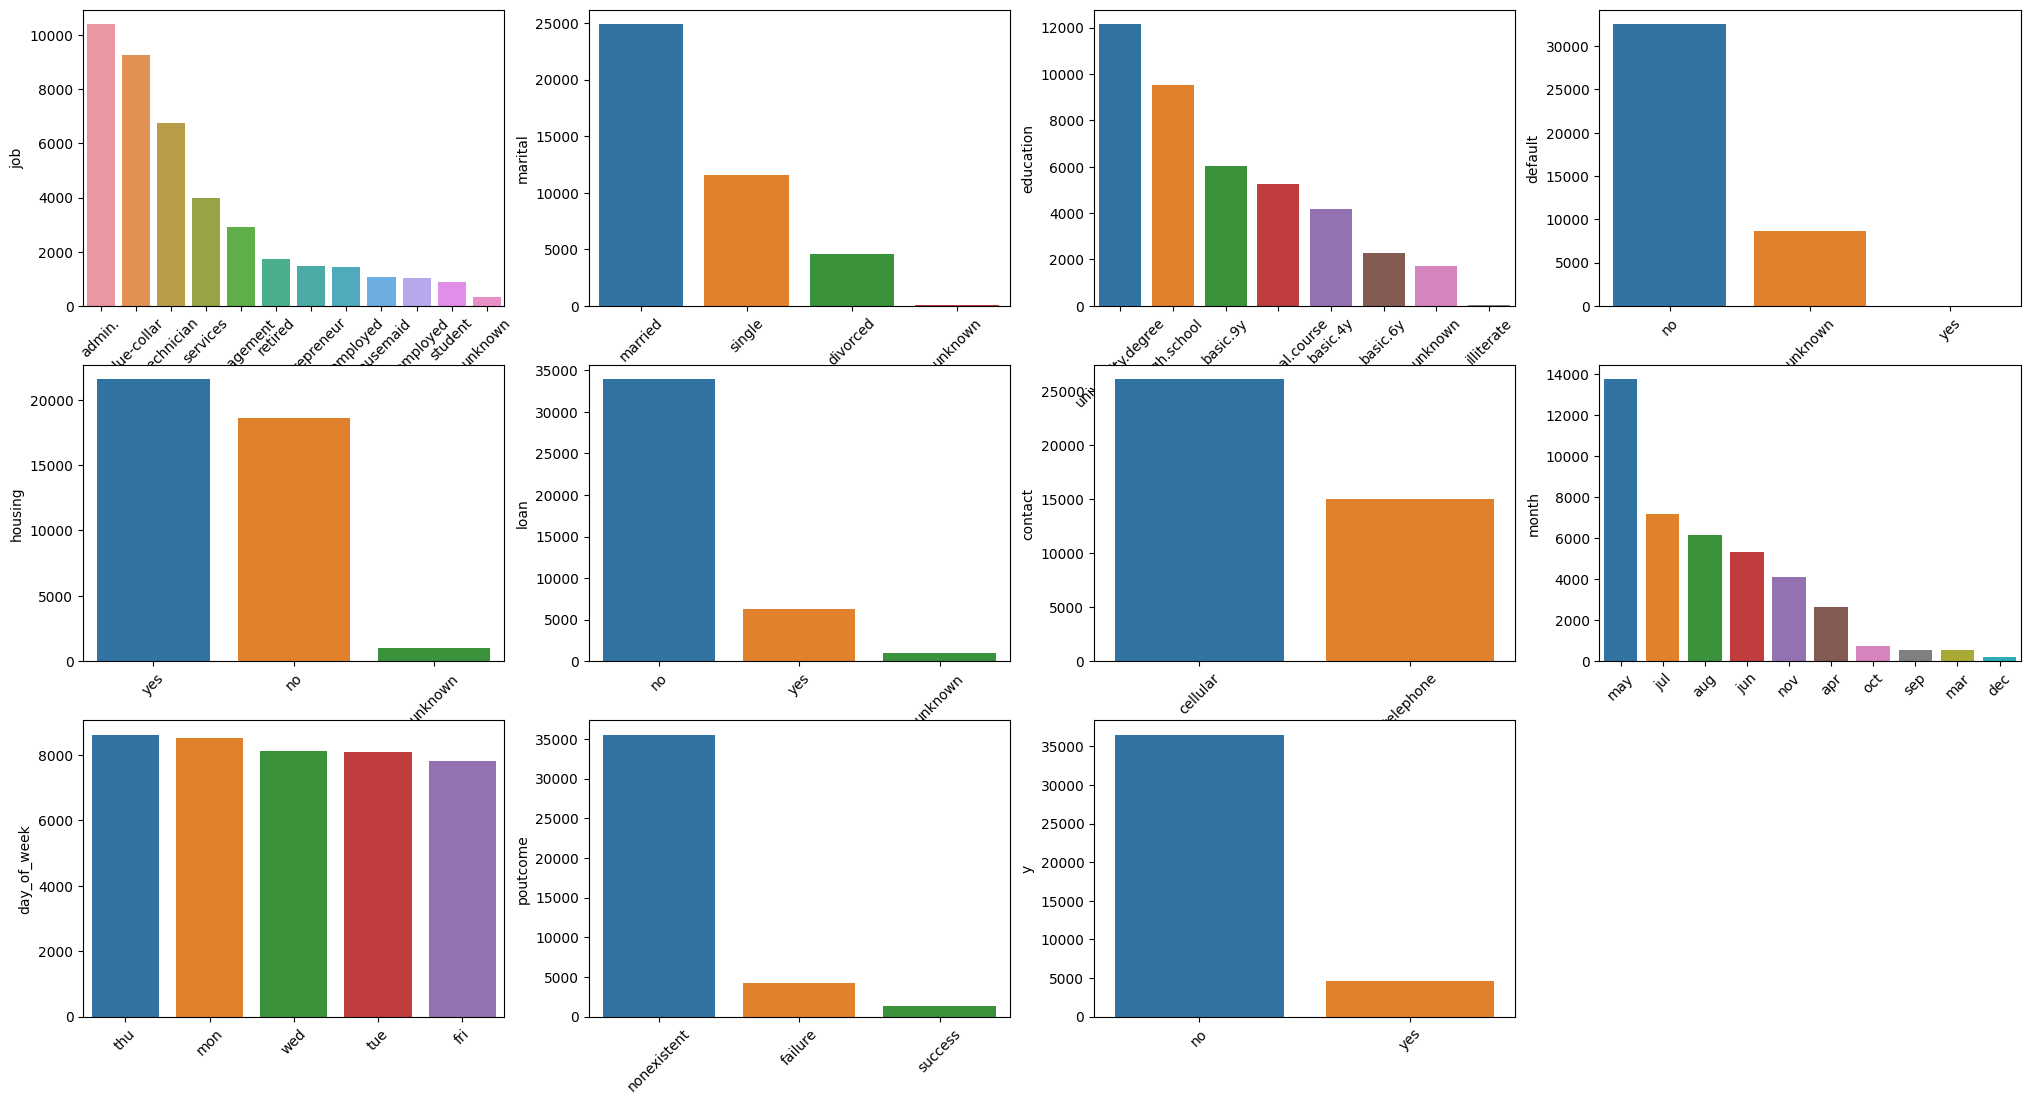

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(25,50))
index = 1
  
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=45)
  sns.barplot(x=list(y.index), y=y)
  index +=1

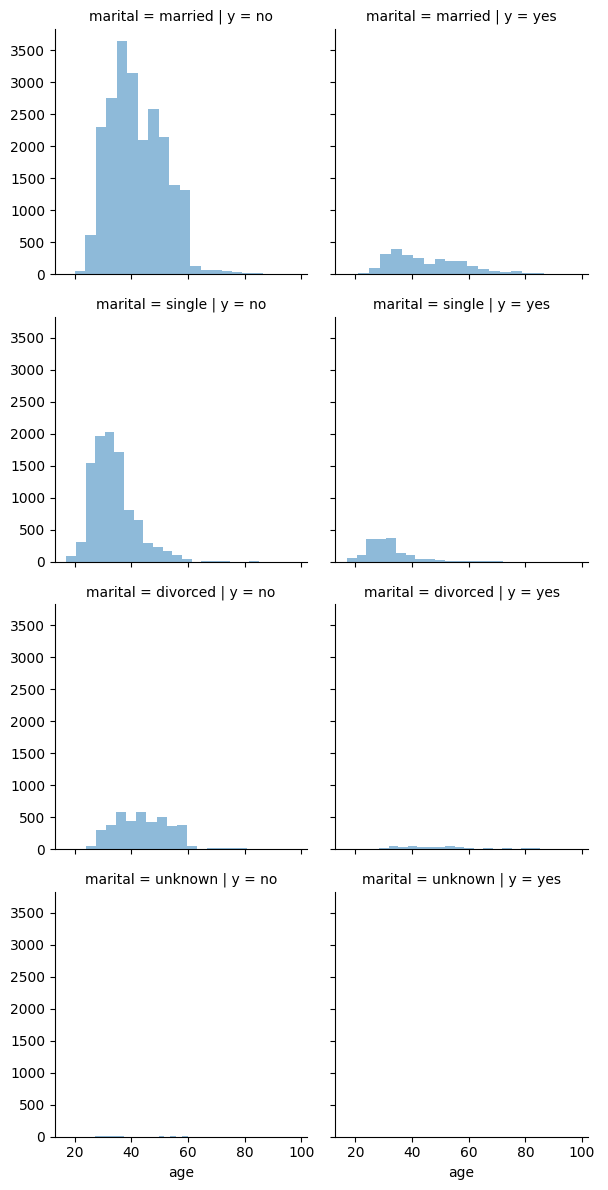

In [9]:
# marital and age
grid = sns.FacetGrid(data, col='y', row='marital')
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [10]:
# Subcribe by Client Demography

# marital
data_mar = data[['marital', 'y']]
agg_mar = data_mar.groupby(['marital', 'y'])['y'].count().unstack().fillna(0)

# job
data_job = data[['job', 'y']]
agg_job = data_job.groupby(['job', 'y'])['y'].count().unstack().fillna(0)

# education
data_edu = data[['education', 'y']]
agg_edu = data_edu.groupby(['education', 'y'])['y'].count().unstack().fillna(0)

# default
data_default = data[['default', 'y']]
agg_def = data_default.groupby(['default', 'y'])['y'].count().unstack().fillna(0)

# loan
data_loan = data[['loan', 'y']]
agg_loan = data_loan.groupby(['loan', 'y'])['y'].count().unstack().fillna(0)

# housing
data_housing = data[['housing', 'y']]
agg_housing = data_housing.groupby(['housing', 'y'])['y'].count().unstack().fillna(0)
agg_housing

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


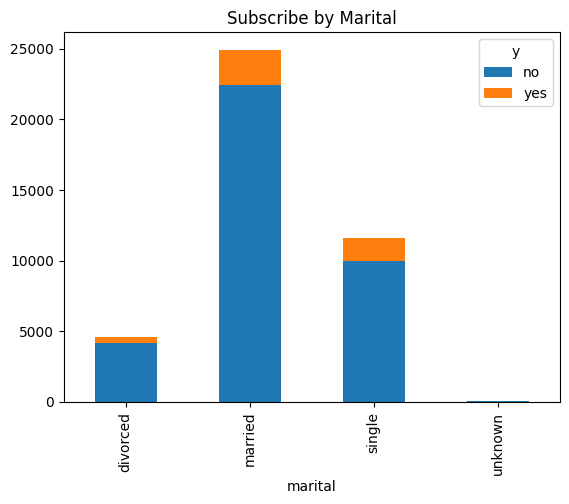

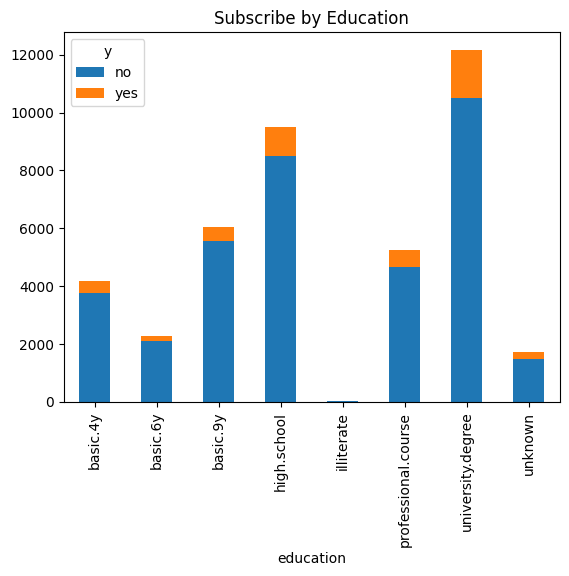

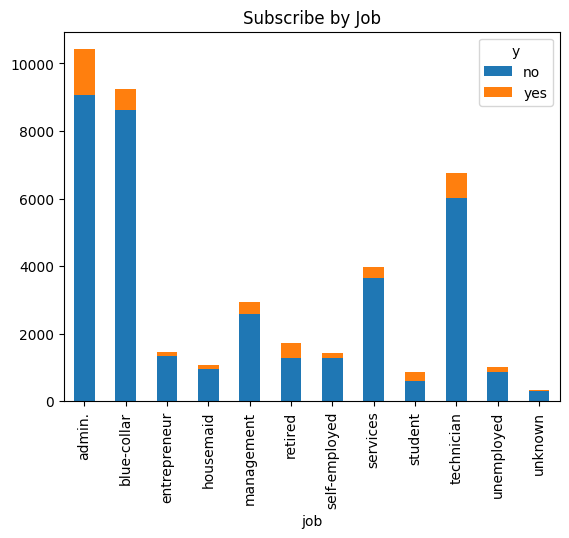

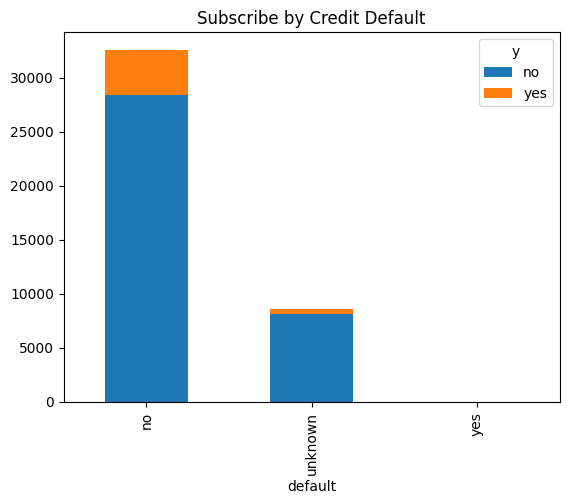

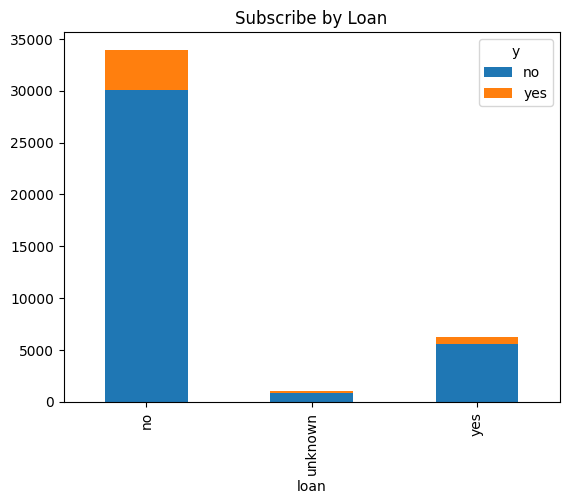

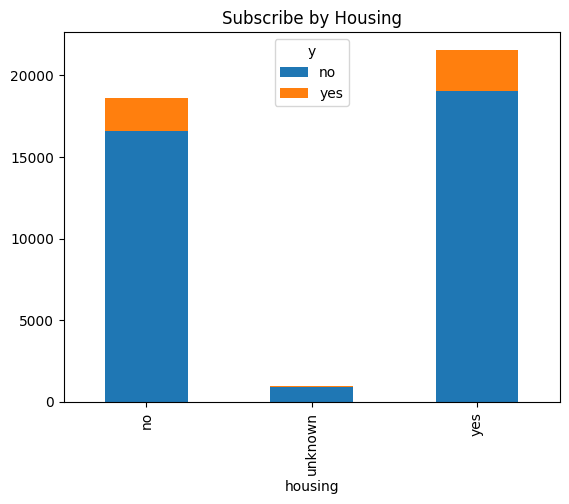

In [11]:
# by Marital
agg_mar.plot(kind='bar', stacked=True)
plt.title('Subscribe by Marital')
plt.xticks(rotation=90, ha='center')

# by Education
agg_edu.plot(kind='bar', stacked=True)
plt.title('Subscribe by Education')
plt.xticks(rotation=90, ha='center')

# by Job
agg_job.plot(kind='bar', stacked=True)
plt.title('Subscribe by Job')
plt.xticks(rotation=90, ha='center')

# by Default
agg_def.plot(kind='bar', stacked=True)
plt.title('Subscribe by Credit Default')
plt.xticks(rotation=90, ha='center')

# by Loan
agg_loan.plot(kind='bar', stacked=True)
plt.title('Subscribe by Loan')
plt.xticks(rotation=90, ha='center')

# by Housing
agg_housing.plot(kind='bar', stacked=True)
plt.title('Subscribe by Housing')
plt.xticks(rotation=90, ha='center')

plt.show()

Client demography contibute to output variable (column 'y') because background client influence them to subscribe the campaign or not.

In [12]:
# Subcribe by related with the last contact of the current campaign

# contact
data_contact = data[['contact', 'y']]
agg_contact = data_contact.groupby(['contact', 'y'])['y'].count().unstack().fillna(0)

# month
data_month = data[['month', 'y']]
agg_month = data_month.groupby(['month', 'y'])['y'].count().unstack().fillna(0)

# day_of_week
data_dow = data[['day_of_week', 'y']]
agg_dow = data_dow.groupby(['day_of_week', 'y'])['y'].count().unstack().fillna(0)

# poutcome
data_poutcome = data[['poutcome', 'y']]
agg_poutcome = data_poutcome.groupby(['poutcome', 'y'])['y'].count().unstack().fillna(0)

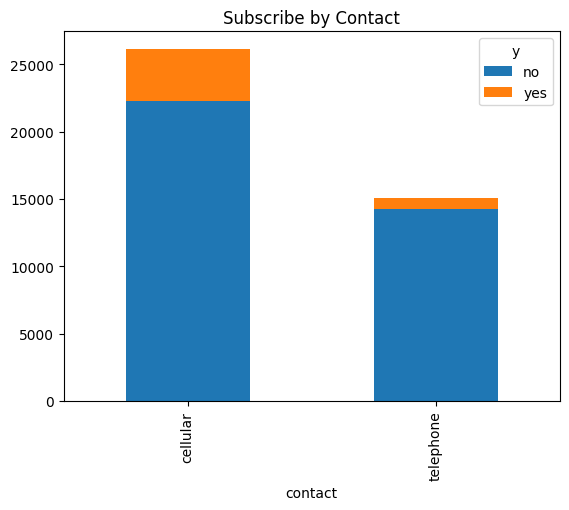

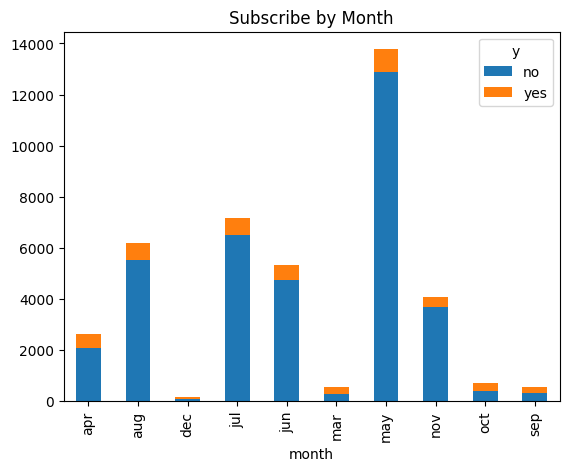

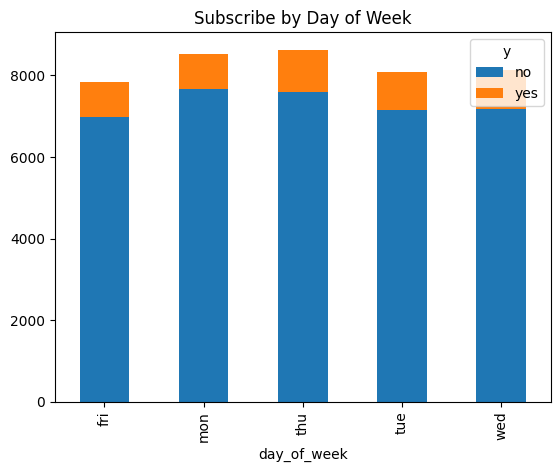

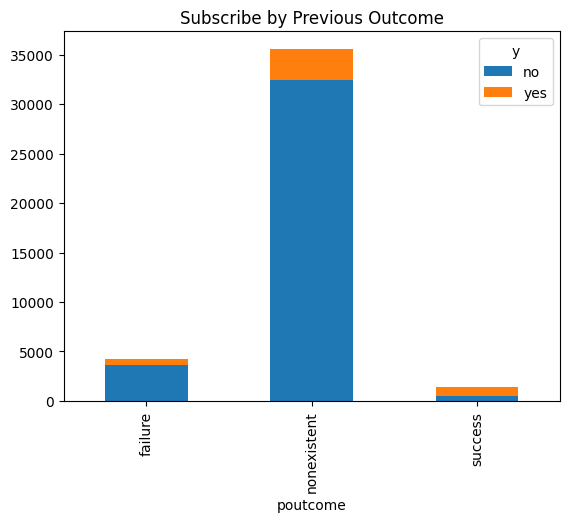

In [13]:
# by contact
agg_contact.plot(kind='bar', stacked=True)
plt.title('Subscribe by Contact')
plt.xticks(rotation=90, ha='center')

# by month
agg_month.plot(kind='bar', stacked=True)
plt.title('Subscribe by Month')
plt.xticks(rotation=90, ha='center')

# by day of week
agg_dow.plot(kind='bar', stacked=True)
plt.title('Subscribe by Day of Week')
plt.xticks(rotation=90, ha='center')

# by poutcome
agg_poutcome.plot(kind='bar', stacked=True)
plt.title('Subscribe by Previous Outcome')
plt.xticks(rotation=90, ha='center')

plt.show()

The month and day of week do not seem to have a significant effect because the comparison between those who subscribe and not between each category looks the same. Contact also has no influence on decision making whether to subscribe to the campaign or not.

In [14]:
# change column y to numeric
# 0 = no and 1 = yes
label_encoder = LabelEncoder()
x = data['y']
subcribe = label_encoder.fit_transform(x)

data['subscribe'] = subcribe
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


<ipython-input-15-5d7fdfb79d5e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',


<Axes: >

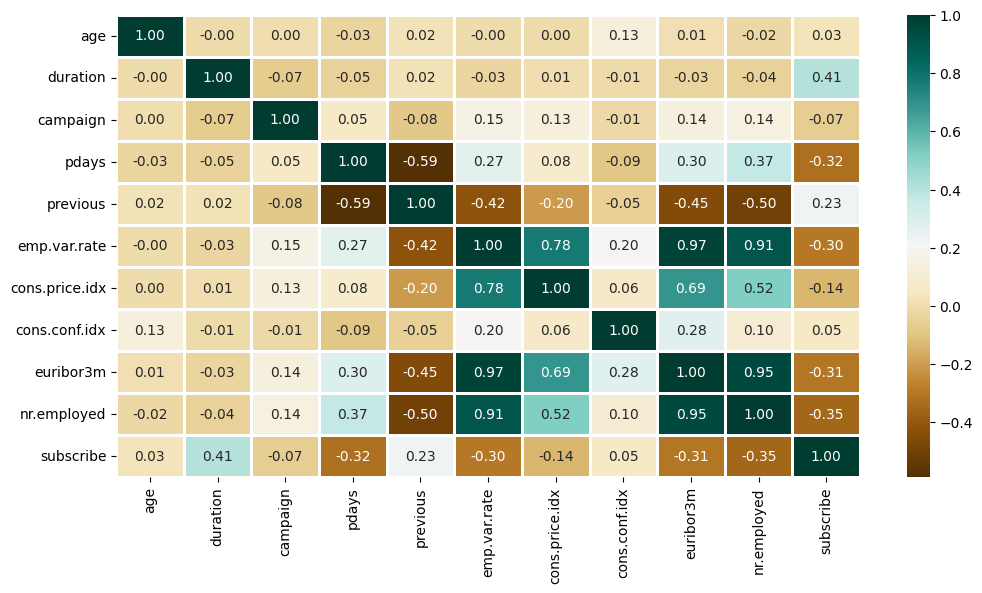

In [15]:
# Correlation
plt.figure(figsize=(12,6))
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

column "y" have strong enough possitive correlation with "duration", good negative correlation with "pdays" and "nr.employed".
- duration: last contact duration, in seconds
- pdays : number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- nr.employed : number of employees - quarterly indicator

We can ignore the numeric features that have correlation between -0.32 < corr < 0.3 with "y" except column "age".

<function matplotlib.pyplot.show(close=None, block=None)>

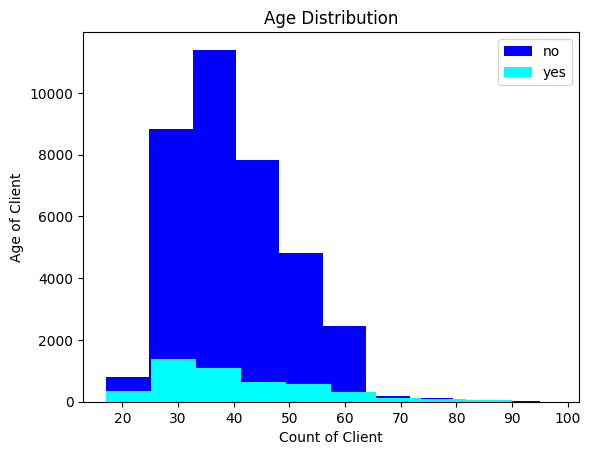

In [16]:
# Age
yes = data[(data["y"] == "yes")]
no = data[(data["y"] == "no")]

plt.hist(no["age"], bins=10, color = "blue", label = "no")
plt.hist(yes["age"], bins=10, color = "cyan",  label = "yes")
plt.xlabel("Count of Client")
plt.ylabel("Age of Client")
plt.title("Age Distribution")
plt.legend()
plt.show

The correlation between age and subscribe is the most subsciber is in age range 25-35.

So the features to consider in making predictions are: 
age, job, marital, education, default, housing, loan, poutcome, duration, pdays, and nr.employed.

# Converting Feature
Convert all feature that consider in making prediction in numeric

In [17]:
# the data
df = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'duration', 'pdays', 'nr.employed', 'subscribe']]
df

,age,job,marital,education,default,housing,loan,poutcome,duration,pdays,nr.employed,subscribe
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,261,999,5191.0,0
1,57,services,married,high.school,unknown,no,no,nonexistent,149,999,5191.0,0
2,37,services,married,high.school,no,yes,no,nonexistent,226,999,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,nonexistent,151,999,5191.0,0
4,56,services,married,high.school,no,no,yes,nonexistent,307,999,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nonexistent,334,999,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,nonexistent,383,999,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,nonexistent,189,999,4963.6,0
41186,44,technician,married,professional.course,no,no,no,nonexistent,442,999,4963.6,1


In [18]:
label_encoder = LabelEncoder()

# change column job to numeric
job_ = df['job']
job_en = label_encoder.fit_transform(job_)
df['job'] = job_en

# change column marital to numeric
mar_ = df['marital']
mar_en = label_encoder.fit_transform(mar_)
df['marital'] = mar_en

# change column education to numeric
edu_ = df['education']
edu_en = label_encoder.fit_transform(edu_)
df['education'] = edu_en

# change column default to numeric
default_ = df['default']
default_en = label_encoder.fit_transform(default_)
df['default'] = default_en

# change column loan to numeric
loan_ = df['loan']
loan_en = label_encoder.fit_transform(loan_)
df['loan'] = loan_en

# change column housing to numeric
housing_ = df['housing']
housing_en = label_encoder.fit_transform(housing_)
df['housing'] = housing_en

# change column poutcome to numeric
poutcome_ = df['poutcome']
poutcome_en = label_encoder.fit_transform(poutcome_)
df['poutcome'] = poutcome_en

# change column pdays to numeric
pdays_ = df['pdays']
pdays_en = label_encoder.fit_transform(pdays_)
df['pdays'] = pdays_en

# change column nr.employed to numeric
nrem_ = df['nr.employed']
nrem_en = label_encoder.fit_transform(nrem_)
df['nr.employed'] = nrem_en

df

<ipython-input-18-c29bad5a7a33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = job_en
<ipython-input-18-c29bad5a7a33>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'] = mar_en
<ipython-input-18-c29bad5a7a33>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,age,job,marital,education,default,housing,loan,poutcome,duration,pdays,nr.employed,subscribe
0,56,3,1,0,0,0,0,1,261,26,8,0
1,57,7,1,3,1,0,0,1,149,26,8,0
2,37,7,1,3,0,2,0,1,226,26,8,0
3,40,0,1,1,0,0,0,1,151,26,8,0
4,56,7,1,3,0,0,2,1,307,26,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,1,334,26,0,1
41184,46,1,1,5,0,0,0,1,383,26,0,0
41185,56,5,1,6,0,2,0,1,189,26,0,0
41186,44,9,1,5,0,0,0,1,442,26,0,1


In [19]:
df["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [20]:
# Grouping Age
ages = pd.DataFrame(df['age'])

bins = [17, 29, 32, 35, 39, 45, 52, 98]
labels = [0, 1, 2, 3, 4, 5, 6]
df['age_range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

print(df)

       age  job  marital  education  default  housing  loan  poutcome  \
0       56    3        1          0        0        0     0         1   
1       57    7        1          3        1        0     0         1   
2       37    7        1          3        0        2     0         1   
3       40    0        1          1        0        0     0         1   
4       56    7        1          3        0        0     2         1   
...    ...  ...      ...        ...      ...      ...   ...       ...   
41183   73    5        1          5        0        2     0         1   
41184   46    1        1          5        0        0     0         1   
41185   56    5        1          6        0        2     0         1   
41186   44    9        1          5        0        0     0         1   
41187   74    5        1          5        0        2     0         0   

       duration  pdays  nr.employed  subscribe age_range  
0           261     26            8          0         6  
1    

<ipython-input-20-ce633ba686de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)


In [21]:
df['age_range'].value_counts()

4    6750
5    6184
3    6094
0    5669
6    5647
1    5507
2    5337
Name: age_range, dtype: int64

In [22]:
df["duration"].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [23]:
# Grouping Duration
durations = pd.DataFrame(df['duration'])

bins = [0, 60, 90, 120, 155, 192, 250, 340, 510, 4918]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df['duration_range'] = pd.cut(durations.duration, bins, labels = labels,include_lowest = True)

print(df)

<ipython-input-23-8fe88da9882e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_range'] = pd.cut(durations.duration, bins, labels = labels,include_lowest = True)


       age  job  marital  education  default  housing  loan  poutcome  \
0       56    3        1          0        0        0     0         1   
1       57    7        1          3        1        0     0         1   
2       37    7        1          3        0        2     0         1   
3       40    0        1          1        0        0     0         1   
4       56    7        1          3        0        0     2         1   
...    ...  ...      ...        ...      ...      ...   ...       ...   
41183   73    5        1          5        0        2     0         1   
41184   46    1        1          5        0        0     0         1   
41185   56    5        1          6        0        2     0         1   
41186   44    9        1          5        0        0     0         1   
41187   74    5        1          5        0        2     0         0   

       duration  pdays  nr.employed  subscribe age_range duration_range  
0           261     26            8          0   

In [24]:
df['duration_range'].value_counts()

5    4980
6    4914
3    4752
8    4752
7    4575
2    4359
4    4298
0    4286
1    4272
Name: duration_range, dtype: int64

All feature was numeric, drop the column 'age' and 'duration'

In [25]:
df = df.drop(['age', 'duration'], axis=1)
df

,job,marital,education,default,housing,loan,poutcome,pdays,nr.employed,subscribe,age_range,duration_range
0,3,1,0,0,0,0,1,26,8,0,6,6
1,7,1,3,1,0,0,1,26,8,0,6,3
2,7,1,3,0,2,0,1,26,8,0,3,5
3,0,1,1,0,0,0,1,26,8,0,4,3
4,7,1,3,0,0,2,1,26,8,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,1,26,0,1,6,6
41184,1,1,5,0,0,0,1,26,0,0,5,7
41185,5,1,6,0,2,0,1,26,0,0,6,4
41186,9,1,5,0,0,0,1,26,0,1,4,7


# Building Machine Learning Models

**Split train and test data**

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['subscribe'],axis=1)
Y = df['subscribe']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.2,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((32950, 11), (8238, 11), (32950,), (8238,))

**Model Training and Evaluation**

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 100,
							random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_train)
	print("Accuracy score of ",
		clf.__class__.__name__,
		"=",100*metrics.accuracy_score(Y_train,
										Y_pred))


Accuracy score of  RandomForestClassifier = 97.90895295902882
Accuracy score of  KNeighborsClassifier = 93.68133535660091
Accuracy score of  SVC = 90.17298937784523
Accuracy score of  LogisticRegression = 90.88922610015175


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest has the best score for prediction. Lets check with K-Fold Cross Validation.

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.89408194 0.90288316 0.90136571 0.8983308  0.89711684 0.8952959
 0.89256449 0.89438543 0.9016692  0.88649469]
Mean: 0.8964188163884674
Standard Deviation: 0.004713486151159576


The model has a average accuracy of 89% with a standard deviation of 0.47 %. So the accuracy of model can differ + - 0.47%.

# Random Forest

**Feature Importance**

In [33]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(12)

,importance
feature,
duration_range,0.254
nr.employed,0.202
job,0.113
age_range,0.110
education,0.095
poutcome,0.053
pdays,0.052
marital,0.044
housing,0.037


<Axes: xlabel='feature'>

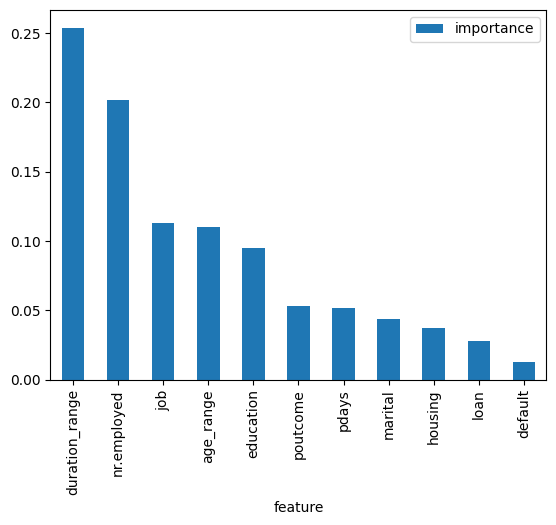

In [34]:
importances.plot.bar()

**Training Random Forest again**

In [59]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.91 %


**Out-of-bag samples to estimate the generalization accuracy.** Out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [37]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 89.59 %


**Test new parameters**

In [45]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 15,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


oob score: 90.60000000000001 %


**Further Evaluation**

Confusion Matrix

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
print(confusion_matrix(Y_train, predictions))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[[28373   881]
 [ 2255  1441]]


TN : 28373
FP : 881
FN : 2255
TP : 1441

Precision and Recall

In [51]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.6205857019810508
Recall: 0.3898809523809524


The model predicts 62% of the time, a subscribers correctly (precision). It predicted the subscribers of 39% (recall) of the people who actually subscribe.

F-Score

In [52]:
from sklearn.metrics import f1_score

f1_score(Y_train, predictions)

0.478896643403124

F-score is not high, 48%, it is beacuse the recall is just 39%.

**Precision Recall Curve**

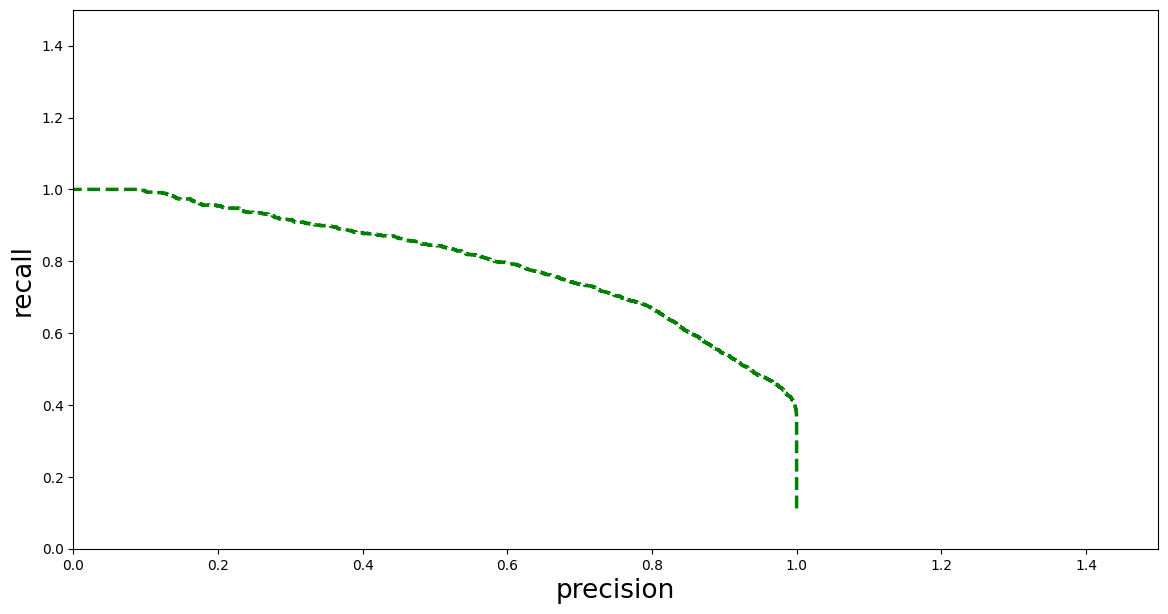

In [54]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**ROC AUC Curve**

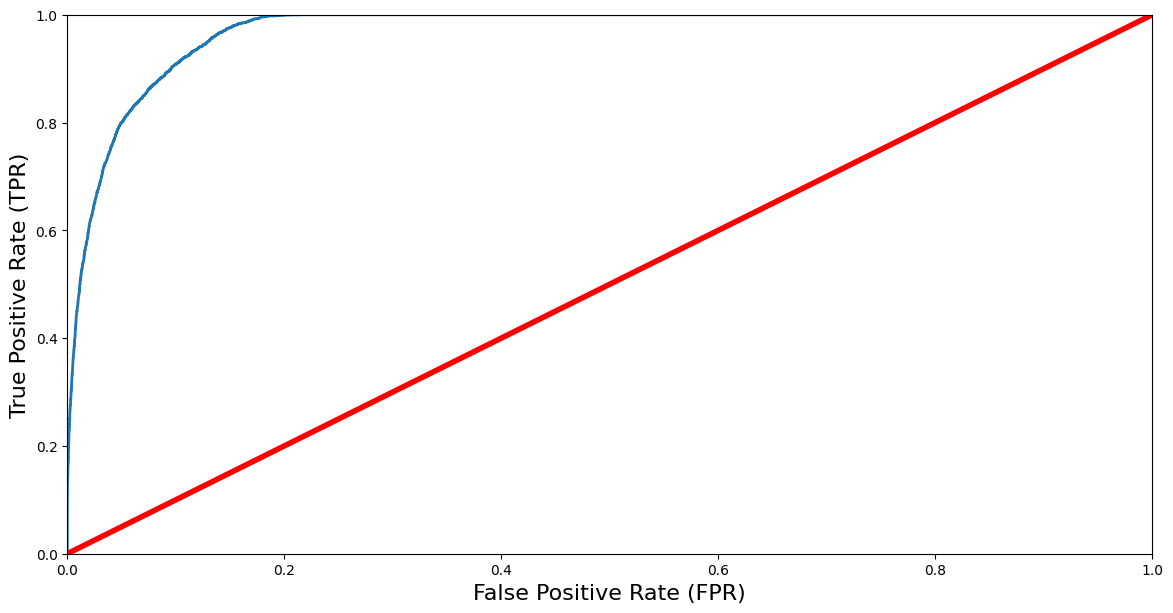

In [55]:
from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9699060745605662


**NOTE** :
Because this dataset doesn't have primary key so i just check the accuracy of several algoritm and decided to use random forest for best prediction. I dont do a final test with the data because there is no primary key.

**References**:
1. https://www.kaggle.com/code/niklasdonges/end-to-end-project-with-python/notebook
2. https://www.geeksforgeeks.org/loan-approval-prediction-using-machine-learning/